In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

## 1. Answer with the type of test you would use (assume normal distribution):
- Is there a difference in grades of students on the second floor compared to grades of all students?
- Are adults who drink milk taller than adults who dont drink milk?
- Is the the price of gas higher in texas or in new mexico?
- Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

In [2]:
#Is there a difference in grades of students on the 
#second floor compared to grades of all students?

# 1-sample, 2-tailed test
#h_0 : there is no difference between student grades on the 2nd floor from all students
#h_a : there is a difference between student grades on the 2nd floor from all students

In [3]:
#Are adults who drink milk taller than adults who dont drink milk?

# 2-sample, 1-tailed test
# h_0 : adults who drink milk are <= height as adults who don't drink milk
# h_a : adults who drink milk are > height as adults who don't drink milk

In [4]:
#Is the the price of gas higher in texas or in new mexico?

# 2x 2-sample, 1-tailed test
# 1-h_0 : gas price in texas is <= price in new mexico
# 1-h_a : gas price in texas is > price in new mexico
# 2-h_0 : gas price in new mexico is <= price in texas
# 2-h_a : gas price in new mexico is > price in texas

In [5]:
#Are there differences in stress levels between students who take 
#data science vs students who take web development vs students who take cloud academy?

# ANOVA: 
# scipy.stats.f_oneway
# 1-h_0 : stress of students are = stress of other students
# 1-h_a : stress of data science students != web dev students != cloud academy students

## 2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

H$_0$ : average time to sell home at office 1 = avg time to sell home at office 2

H$_a$ : avg time to sell home at office 1 != avg time to sell home at office 2

alpha : 0.05

We will use a 2-sample, 2-tailed test : stats.ttest_ind_from_stats()

In [6]:
# assign variables to our sample stats
α = 0.05
office_1_n = 40
office_1_mean = 90
office_1_stddev = 15
office_2_n = 50
office_2_mean = 100
office_2_stddev = 20

In [7]:
office_1 = stats.norm(90, 15).rvs(40)
office_2 = stats.norm(100, 20).rvs(50)

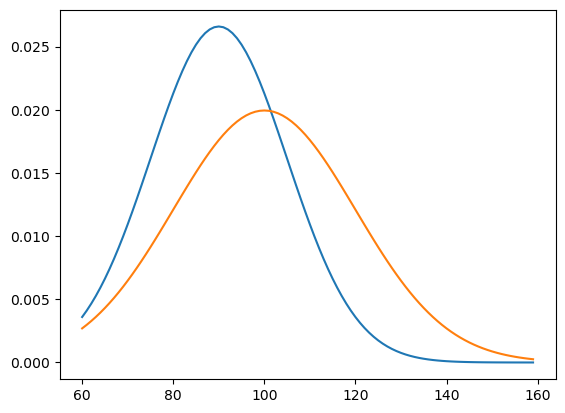

In [8]:
x = np.arange(60,160)
y = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)
plt.plot(x, y)
plt.plot(x, y2);

#### sub-test
check for normality

In [9]:
office_1_n >= 30

True

In [10]:
office_2_n >= 30

True

both datasets are normal(ish)

### check for variance equivelency
var = $σ^2$

In [11]:
stats.levene(office_1, office_2)

LeveneResult(statistic=2.1269024175892253, pvalue=0.14829293537930732)

In [12]:
#var = σ ** 2
off_1_var = office_1_stddev ** 2
off_2_var = office_2_stddev ** 2

In [13]:
print(off_1_var)
print(off_2_var)

225
400


variances are not equal

In [14]:
t_stat, p_val = stats.ttest_ind_from_stats(
    office_1_mean, office_1_stddev, office_1_n,
    office_2_mean, office_2_stddev, office_2_n,
    equal_var=False)

In [15]:
t_stat

-2.7091418459143854

In [16]:
p_val

0.00811206270346016

In [17]:
# 2-tailed test so looking for p_val < alpha
p_val < α

True

The p_value is less than our alpha, therefore we will:

Reject H$_0$ and suggest that there is a difference in the mean time to sell a house between the 2 offices

## 3. Load the mpg dataset and use it to answer the following questions:
- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

In [18]:
mpg = data('mpg')

In [19]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [20]:
#create a column for the average of cty and hwy fuel effiencies
# mpg['fuel'] = (mpg.cty + mpg.hwy) / 2 
#this is not correct mean for an average rate

# harmonic mean is used for an average of rates
mpg['fuel'] = stats.hmean((mpg.cty, mpg.hwy))

In [21]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

H$_0$ : there is no difference between avg fuel-effiency of 2008 cars and 1999 cars

H$_a$ : there is a difference between avg fuel-effiency of 2008 cars and 1999 cars

alpha : 0.05

This will be a 2-sample, 2-tailed test

In [22]:
fuel_1999 = mpg[mpg.year == 1999].fuel
fuel_2008 = mpg[mpg.year == 2008].fuel

### sub-tests
are samples normal

are variances equal

In [23]:
fuel_1999.size, fuel_2008.size

(117, 117)

sample sizes are > 30, so we can assume normal

levene test to check if variances are equal

h_0: varainces are equal

h_a: variance are different

alpha 0.05

In [24]:
#levene test to check variance equivalency
stats.levene(fuel_1999, fuel_2008)

LeveneResult(statistic=0.031071867429515194, pvalue=0.8602339200830025)

p_value of levene test is > alpha of 0.05, therefore we fail to reject the h_0, the variances are equal

In [25]:
t_stat, p_val = stats.ttest_ind(fuel_1999, fuel_2008, equal_var=True)

In [26]:
t_stat

0.3011962975077886

In [27]:
# 2-tailed test so looking for p_val < α
p_val < α

False

p_val > alpha, therefore we fail to reject the H_0, there is not enough evidence to show a difference between avg fuel effiency of vehicles from 1999 and 2008

### Are compact cars more fuel-efficient than the average car?
H$_0$ : compact car avg fuel efficiency <= that of dataset avg fuel efficiency

H$_a$ : compact car avg fuel efficiency > that of dataset avg fuel eff

alpha : 0.05

This will be a 1-sample, 1-tailed test

In [28]:
mpg['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

In [29]:
compact_fuel = mpg[mpg['class'] == 'compact'].fuel
avg_fuel = mpg[mpg['class'] != 'compact'].fuel.mean()

In [30]:
compact_fuel.mean()

23.500416808701296

In [31]:
avg_fuel

18.601568632712326

#### sub-tests
check if normal

In [32]:
compact_fuel.size

47

datasets are normal

In [33]:
# 1-tailed where we want to see if compact_fuel is > avg_fuel, 
#so enter compact_fuel first and look for a positive t_stat
t_stat, p_val = stats.ttest_1samp(compact_fuel, avg_fuel)

In [34]:
# t_stat needs to be positive to reject h_0
t_stat > 0

True

In [35]:
t_stat

9.400493378608301

In [36]:
# 1-tailed test so looking for p_val / 2 < α
p_val / 2 < α

True

the t_stat is > 0 and p_val/2 is < alpha, therefore we:

Reject H$_0$ there is enough evidence suggest that compact car fuel efficiency is greater than the dataset average fuel efficiency

### Do manual cars get better gas mileage than automatic cars?
H$_0$ : manual cars avg fuel efficiency is <= that of automatic transmission cars

H$_a$ : manual cars avg fuel efficiency is > that of automatic transmission cars

alpha : 0.05

this will be a 2-sample, 1-tailed test

In [37]:
mpg['is_manual'] = mpg['trans'].str.startswith('manu')

In [38]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel,is_manual
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766,False
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000,True
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725,True
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882,False
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524,False


In [39]:
manual_fuel = mpg[mpg.is_manual == True].fuel
auto_fuel = mpg[mpg.is_manual == False].fuel

#### Sub-tests
check if both datasets normal

check if variance is equal
- h_0: variances are equal
- h_a: variances are different
- alpha: 0.05

In [40]:
manual_fuel.size, auto_fuel.size

(77, 157)

both datasets are normal

In [41]:
stats.levene(manual_fuel, auto_fuel)

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

p_val > α, therefore we fail to reject that the variances are equal

In [42]:
# 1-tailed looking for manual_fuel > auto_fuel so we enter manual_fuel first 
# and look for positive t
t_stat, p_val = stats.ttest_ind(manual_fuel, auto_fuel, equal_var=True)

In [43]:
# looking for positive t_stat in order to reject h_0
# 1-tailed test so looking for p_val/2 < α to reject h_0
(t_stat > 0) and (p_val / 2 < α)

True

t_stat is positive and p_val / 2 is less than alpha, therefore we:

Reject H$_0$ there is enough evidence to suggest that manual transmission vehicle fuel efficiency is greater than automatic transmission vehicle fuel efficiency